In [4]:
#from experiment_logger import ExperimentLogger

In [5]:
# Biliotecas

# Tratamento dos dados
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", None)

# Configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# !pip install pandas matplotlib seaborn
# !pip install lifelines # regressão cox
# !pip install neurokit2
#!pip install jinja2
#pip install tensorflow keras lifelines

# !pip install pycox           # pycox (baseado em PyTorch)
# !pip install scikit-survival # scikit-survival (integra com scikit-learn)

# ! pip install sklearn-pandas #Uncomment to install `sklearn-pandas`


#!pip uninstall scipy
#!pip install scipy==1.13.1  # esta versão estável e compatível com pycoxe e compativel com o python3.12 e tambem é a ultima que utiliza a função simps que sera substituida por outra versão simpson que vai ser removida na versão 1.14.0
#!pip install torchtuples


!pip list

In [7]:
# from google.colab import drive

# drive.mount('/content/drive')

In [8]:
# from google.colab import drive

# drive.mount('/content/drive')
# link_definicao = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/Tese_dissertativo_Mestrado/Projeto_Tese_mestrado/02_Dataset/subject-info_definitions.csv'
# link_codes = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/Tese_dissertativo_Mestrado/Projeto_Tese_mestrado/02_Dataset/subject-info_codes.csv'

In [9]:
link_codes = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\subject-info_codes.csv'
link_definicao = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\subject-info_definitions.csv'
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'

In [10]:
df_def = pd.read_csv(link_definicao, delimiter=';')
df_cod = pd.read_csv(link_codes, delimiter=';',encoding = 'latin')
df = pd.read_csv(link_csv)

In [11]:
df.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,

In [12]:
print(f'Quantidade de colunas: {df.shape[1]}')
print(f'Quantidade de linhas: {df.shape[0]}')

Quantidade de colunas: 105
Quantidade de linhas: 992


In [13]:
df.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,

In [14]:
# dados = pd.DataFrame(df.loc[:,df.columns[0]:'Nitrovasodilator (yes=1)'])
#dados = df.loc[:,df.columns[0]:'Nitrovasodilator (yes=1)']
dados = df.copy()
dados.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,

In [15]:

print(f'Quantidade de colunas: {dados.shape[1]}')
print(f'Quantidade de linhas: {dados.shape[0]}')

Quantidade de colunas: 105
Quantidade de linhas: 992


In [16]:
dados.iloc[:,2].describe()

count     992.000000
mean     1212.561492
std       439.881734
min        33.000000
25%      1082.250000
50%      1460.000000
75%      1460.000000
max      1460.000000
Name: days_4years, dtype: float64

In [17]:
dados[['Patient ID','Follow-up period from enrollment (days)','days_4years','Exit of the study','Cause of death']].head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death
0,P0001,2065,1460,0.0,0
1,P0002,2045,1460,0.0,0
2,P0003,2044,1460,0.0,0
3,P0004,2044,1460,0.0,0
4,P0005,2043,1460,0.0,0


In [18]:
pd.unique(dados['Exit of the study'])

array([0., 3., 1., 2.])

# **Painel e Relatório**

In [19]:
# Colunas

# Identificação e Acompanhamento
identificacao_acompanhamento = [
    'Patient ID',
    'Follow-up period from enrollment (days)',
    'days_4years',
    'Exit of the study',
    'Cause of death'
]

# Eventos e Condições Cardiovasculares
eventos_condicoes_cardiovasculares = [
    'SCD_4years SinusRhythm',
    'HF_4years SinusRhythm',
    'Number of ventricular premature contractions per hour',
    'Non-sustained ventricular tachycardia (CH>10)',
    'Number of supraventricular premature beats in 24h',
    'Paroxysmal supraventricular tachyarrhythmia'
]

# Dados Demográficos e Clínicos
dados_demograficos_clinicos = [
    'Age',
    'Gender (male=1)',
    'Weight (kg)',
    'Height (cm)',
    'Body Mass Index (Kg/m2)',
    'NYHA class'
]

# Sinais Vitais e Diagnósticos
sinais_vitais_diagnosticos = [
    'Systolic blood pressure (mmHg)',
    'HF etiology - Diagnosis'
]

# Comorbidades e Históricos Médicos
comorbidades_historicos = [
    'Diabetes (yes=1)',
    'History of dyslipemia (yes=1)',
    'Peripheral vascular disease (yes=1)',
    'History of hypertension (yes=1)',
    'Prior Myocardial Infarction (yes=1)',
    'Prior implantable device',
    'Prior Revascularization',
    'Syncope'
]

# Hábitos e Consumos
habitos_consumos = [
    'daily smoking (cigarretes/day)',
    'smoke-free time (years)',
    'cigarettes /year',
    'alcohol consumption (standard units)'
]

# Exames Laboratoriais
exames_laboratoriais = [
    'Albumin (g/L)',
    'ALT or GPT (IU/L)',
    'AST or GOT (IU/L)',
    'Normalized Troponin',
    'Total Cholesterol (mmol/L)',
    'Creatinine (?mol/L)',
    'Gamma-glutamil transpeptidase (IU/L)',
    'Glucose (mmol/L)',
    'Hemoglobin (g/L)',
    'HDL (mmol/L)',
    'Potassium (mEq/L)',
    'LDL (mmol/L)',
    'Sodium (mEq/L)',
    'Pro-BNP (ng/L)',
    'Protein (g/L)',
    'T3 (pg/dL)',
    'T4 (ng/L)',
    'Troponin (ng/mL)',
    'TSH (mIU/L)',
    'Urea (mg/dL)'
]

# Exames de Imagem e Medidas Cardíacas
exames_imagem_medidas = [
    'Signs of pulmonary venous hypertension (yes=1)',
    'Cardiothoracic ratio',
    'Left atrial size (mm)',
    'Right ventricle contractility (altered=1)',
    'Right ventricle end-diastolic diameter (mm)',
    'LVEF (%)',
    'Mitral valve insufficiency ',
    'Mitral flow pattern',
    'Left ventricular posterior wall thickness (mm)',
    'Septal thickness (mm)',
    'Left ventricle end-diastolic diameter (mm)',
    'Left ventricle end-systolic diameter (mm)'
]

# Eletrocardiogramas e Holter
eletrocardiogramas_holter = [
    'Hig-resolution ECG available',
    'ECG rhythm ',
    'Q-waves (necrosis. yes=1)',
    'PR interval (ms)',
    'QRS duration (ms)',
    'QRS > 120 ms ',
    'QT interval (ms)',
    'QT corrected ',
    'Average RR (ms)',
    'Left ventricular hypertrophy (yes=1)',
    'Intraventricular conduction disorder'
]

# Holter
holter = [
    'Holter available',
    'Holter onset (hh:mm:ss)',
    'Holter  rhythm ',
    'minimum RR (ms) ',
    'Average RR (ms)',
    'maximum RR (ms)',
    'RR range (ms)',
    'Number of ventricular premature beats in 24h',
    'Extrasystole couplets ',
    'Ventricular Extrasystole',
    'Non-sustained ventricular tachycardia (CH>10)',
    'Longest RR pause (ms)',
    'Bradycardia',
    'SDNN (ms)',
    'SDANN (ms)',
    'RMSSD (ms)',
    'pNN50 (%)'
]

# Pressão Arterial
pressao_arterial = [
    'Systolic blood pressure (mmHg)',
    'Diastolic blood  pressure (mmHg)'
]

# Medicamentos
medicamentos = [
    'Calcium channel blocker (yes=1)',
    'Diabetes medication (yes=1)',
    'Amiodarone (yes=1)',
    'Angiotensin-II receptor blocker (yes=1)',
    'Anticoagulants/antitrombotics  (yes=1)',
    'Betablockers (yes=1)',
    'Digoxin (yes=1)',
    'Loop diuretics (yes=1)',
    'Spironolactone (yes=1)',
    'Statins (yes=1)',
    'Hidralazina (yes=1)',
    'ACE inhibitor (yes=1)',
    'Nitrovasodilator (yes=1)'
]


titles = ['Identificação e Acompanhamento',
           'Eventos e Condições Cardiovasculares',
          'Dados Demográficos e Clínicos',
          'Sinais Vitais e Diagnósticos',
          'Comorbidades e Históricos Médicos',
          'Hábitos e Consumos',
          'Exames Laboratoriais',
          'Exames de Imagem e Medidas Cardíacas',
          'Eletrocardiogramas e Holter',
          'Holter',
          'Pressão Arterial',
          'Medicamentos']

colunas = [identificacao_acompanhamento,
           eventos_condicoes_cardiovasculares,
           dados_demograficos_clinicos,
           sinais_vitais_diagnosticos,
           comorbidades_historicos,
           habitos_consumos,
           exames_laboratoriais,
           exames_imagem_medidas,
           eletrocardiogramas_holter,
           holter,
           pressao_arterial,
           medicamentos,
           ]

nomes = ['identificacao_acompanhamento',
           'eventos_condicoes_cardiovasculares',
           'dados_demograficos_clinicos',
           'sinais_vitais_diagnosticos',
           'comorbidades_historicos',
           'habitos_consumos',
           'exames_laboratoriais',
           'exames_imagem_medidas',
           'eletrocardiogramas_holter',
           'holter',
           'pressao_arterial',
           'medicamentos',
           ]

# **Limpeza e Tratamento dos Dados**

In [20]:
# subsituindo vazio por zero

dados = dados.iloc[:,1:]
dados = dados.fillna(0)
dados['Holter onset (hh:mm:ss)'] = dados['Holter onset (hh:mm:ss)'] # colocando a coluna de horas no formato original deixando com os vazios em vez de zero

In [21]:
dados.head()

,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,2043,1460,0.0,0,0,0,70,1,97,183,29.

In [22]:
# df_teste.astype(str).str.replace("", '.')


# Renomeia colunas de interesse
dados = df.rename(columns={
    'Patient ID': 'id_paciente',
    'Age': 'Idade',
    'Gender (male=1)':'Sex',
    'Follow-up period from enrollment (days)': 'time',
    'Cause of death': 'event'   
    
})

dados = dados[['id_paciente','Idade','Sex', 'time', 'event']].copy()

causa = dados['event']

# Remover mortes não cardíacas (código 1)
dados_filtrado = dados[causa != 1].copy()

# Criar a variável 'event': 1 para mortes cardíacas (3, 6, 7), 0 para sobrevivente (0)
dados_filtrado['event'] = dados_filtrado['event'].apply(
    lambda x: 1 if x in [3, 6, 7] else 0)

-----------------------------------------------

# CoxPH é um modelo de riscos proporcionais de Cox também conhecido como DeepSurv

Agora vou usar o modelo com rede neural simples com duas camadas do pytoch chamada pycox

Neste caderno, treinaremos o[ método Cox-PH](https://jmlr.org/papers/volume20/18-424/18-424.pdf) , também conhecido como [DeepSurv](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-018-0482-1) . Usaremos os conjuntos de dados do ECG para fins de testes.

Uma introdução mais detalhada ao pycoxpacote pode ser encontrada neste [caderno](https://nbviewer.jupyter.org/github/havakv/pycox/blob/master/examples/01_introduction.ipynb) sobre o LogisticHazardmétodo.

O principal benefício que o Cox-CC (e os outros métodos de Cox) tem sobre o Logistic-Hazard é que ele é um método de tempo contínuo, o que significa que não precisamos discretizar a escala de tempo.

In [24]:
#erro

In [25]:

# !pip install lifelines       # modelo convecional cox
# !pip install pycox           # pycox (baseado em PyTorch)
# !pip install scikit-survival # scikit-survival (integra com scikit-learn)
# !pip install scipy==1.10.1
# ! pip install sklearn-pandas #Uncomment to install `sklearn-pandas`

# Depois reniciar o ambiente de execução
#!pip install torch
#!pip install duckdb
#!pip install PyWavelets

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv


np.random.seed(1234)
_ = torch.manual_seed(123)



## Pre - Processamento do ECG limpeza e filtragem
- Carregamos o conjunto de dados do duckDB atributos do ECG teste com 200 pacientes 


In [ ]:
import pandas as pd
import neurokit2 as nk
import pywt  # Biblioteca para transformada wavelet

class ECGProcessor:
    def __init__(self):
        pass

    
    def wavelet_filter_preservando_qrs(self, signal, wavelet='db6', level=4, atenuacao=0.2):
        coeffs = pywt.wavedec(signal, wavelet, level=level) # menos agressivo

        # Mantém detalhes de nível 1 e 2 (alta frequência = QRS)
        for i in range(3, len(coeffs)):  # Atenua detalhes de nível mais alto
            coeffs[i] *= atenuacao # mantém 20% da energia

        ecg_wavelet_filtered = pywt.waverec(coeffs, wavelet)
        return ecg_wavelet_filtered
    

    def process(self, signal, sampling_rate=200,metodo='neurokit', id_paciente=None):
        """
        Função principal de processamento.
        Limpa o sinal, calcula as métricas HRV, QRS e QTc, e retorna um DataFrame com os resultados.
        """
        #self.signal = signal
        self.fs = sampling_rate
        self.id_paciente = id_paciente  # salva o ID internamente
        

        #teste2
        # Por exemplo: preserve cD1 e cD2
        # zera só os detalhes de níveis mais altos
        ecg_wavelet_filtered = self.wavelet_filter_preservando_qrs(signal, wavelet='db6', level=2, atenuacao=0.2)


        # Limpeza do sinal com o método de Pan-Tompkins
        ecg_limpo = nk.ecg_clean(ecg_wavelet_filtered, sampling_rate=200, method=metodo)

        # Ajuste de escala (opcional): desloca o sinal para cima, garantindo valores positivos
        # self.ecg_limpo = ecg_limpo + 2
        
        

        return self.ecg_limpo


In [49]:
import pandas as pd
import logging
from tqdm import tqdm
import torch
import duckdb

# Conexões separadas
conn_leitura = duckdb.connect("D:/Projeto_Tese_mestrado/02_Dataset/Duckedb/Holter_ECG/1h/banco_ecg.duckdb")
#conn_escrita = duckdb.connect("D:/Projeto_Tese_mestrado/02_Dataset/Duckedb/Holter_ECG/1h/atributos_ecg.duckdb")

# Configuração do logging
logging.basicConfig(filename='processamento_ecg.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Listas para armazenar as amostras processadas
atributo_x = []
atributo_y = []
atributo_z = []
tempos = []
eventos = []
#LIMIT 300;
# Obtendo a lista de pacientes
lista1 = conn_leitura.execute(f"""
    SELECT DISTINCT id_paciente 
    FROM ecg_pacientes 
    ORDER BY id_paciente;
""").fetchdf()

lista2 = dados_filtrado['id_paciente'].unique()
# Filtrando a lista de pacientes para incluir apenas aqueles que estão na lista de pacientes do ECG
lista = lista1[lista1['id_paciente'].isin(lista2)]

# Processamento dos dados dos pacientes
for paciente in tqdm(lista['id_paciente'], desc="Processando pacientes", unit="paciente"):
    # Consulta para pegar os dados do ECG do paciente
    df = conn_leitura.execute(f"""
        SELECT * FROM ecg_pacientes
        WHERE id_paciente = '{paciente}'
        LIMIT 12000;
    """).fetchdf()

    # Extrair os sinais
    ecg_x = df['sinal_x'].values
    ecg_y = df['sinal_y'].values
    ecg_z = df['sinal_z'].values
    
    # Criar o processador de ECG
    atributos = ECGProcessor()

    # Processar cada sinal
    amostra_x = atributos.process(ecg_x, sampling_rate=200, metodo="elgendi2010", id_paciente=paciente)
    amostra_y = atributos.process(ecg_y, sampling_rate=200, metodo="elgendi2010", id_paciente=paciente)
    amostra_z = atributos.process(ecg_z, sampling_rate=200, metodo="elgendi2010", id_paciente=paciente)

    # Adicionar os sinais processados às listas
    atributo_x.append(amostra_x)
    atributo_y.append(amostra_y)
    atributo_z.append(amostra_z)


    # Pegar o tempo e o evento para o paciente
    tempo = dados_filtrado[dados_filtrado['id_paciente'] == f'{paciente}']['time'].iloc[0]
    evento = dados_filtrado[dados_filtrado['id_paciente'] == f'{paciente}']['event'].iloc[0]
    
    tempos.append(tempo)
    eventos.append(evento)


    # Log de processamento
    logging.info(f"Processado paciente {paciente}, épocas processadas: 60, tempo: {tempo} dias, evento: {evento}")

# Aqui você pode fazer a organização dos dados em um único tensor
sinais_segmentados = torch.stack([torch.tensor(atributo_x), torch.tensor(atributo_y), torch.tensor(atributo_z)], dim=1)
tempos_tensor = torch.tensor(tempos)
eventos_tensor = torch.tensor(eventos)

# Agora você pode usar os dados em sinais_segmentados, tempos_tensor e eventos_tensor
# Para alimentar seu modelo de aprendizado de máquina ou rede neural.


Processando pacientes: 100%|██████████| 841/841 [00:31<00:00, 26.73paciente/s]


In [ ]:
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'
df = pd.read_csv(link_csv)

In [ ]:
df.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),Body Mass Index (Kg/m2),NYHA class,Diastolic blood pressure (mmHg),Systolic blood pressure (mmHg),HF etiology - Diagnosis,Diabetes (yes=1),History of dyslipemia (yes=1),Peripheral vascular disease (yes=1),History of hypertension (yes=1),Prior Myocardial Infarction (yes=1),Prior implantable device,Prior Revascularization,Syncope,daily smoking (cigarretes/day),smoke-free time (years),cigarettes /year,alcohol consumption (standard units),Albumin (g/L),ALT or GPT (IU/L),AST or GOT (IU/L),Normalized Troponin,Total Cholesterol (mmol/L),Creatinine (?mol/L),Gamma-glutamil transpeptidase (IU/L),Glucose (mmol/L),Hemoglobin (g/L),HDL (mmol/L),Potassium (mEq/L),LDL (mmol/L),Sodium (mEq/L),Pro-BNP (ng/L),Protein (g/L),T3 (pg/dL),T4 (ng/L),Troponin (ng/mL),TSH (mIU/L),Urea (mg/dL),Signs of pulmonary venous hypertension (yes=1),Cardiothoracic ratio,Left atrial size (mm),Right ventricle contractility (altered=1),Right ventricle end-diastolic diameter (mm),LVEF (%),Mitral valve insufficiency,Mitral flow pattern,Left ventricular posterior wall thickness (mm),Septal thickness (mm),Left ventricle end-diastolic diameter (mm),Left ventricle end-systolic diameter (mm),Hig-resolution ECG available,ECG rhythm,Q-waves (necrosis. yes=1),PR interval (ms),QRS duration (ms),QRS > 120 ms,QT interval (ms),QT corrected,Average RR (ms),Left ventricular hypertrophy (yes=1),Intraventricular conduction disorder,Holter available,Holter onset (hh:mm:ss),Holter rhythm,minimum RR (ms),Average RR (ms),maximum RR (ms),RR range (ms),Number of ventricular premature beats in 24h,Extrasystole couplets,Ventricular Extrasystole,Ventricular Tachycardia,Number of ventricular premature contractions per hour,Non-sustained ventricular tachycardia (CH>10),Number of supraventricular premature beats in 24h,Paroxysmal supraventricular tachyarrhythmia,Longest RR pause (ms),Bradycardia,SDNN (ms),SDANN (ms),RMSSD (ms),pNN50 (%),Calcium channel blocker (yes=1),Diabetes medication (yes=1),Amiodarone (yes=1),Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,0.0,0,0,0,58,1,83,163,31.2,3,75,110,1,0,0,0,0,0,0,0,0,20,20,160600,0,42.4,10.0,20.0,1.0,5.40,106.0,20.0,5.7,132.0,1.29,4.6,3.36,141.0,1834.0,69.0,0.05,15.0,0.01,3.02,7.12,1,0.55,50.0,0.0,24.0,35.0,3,9.0,10.0,10.0,72.0,60.0,1,1,0,999,132,1,448,425,1111,0,2,1,0,1.0,375.0,984.0,2143.0,1768.0,2700.0,10.0,2.0,1.0,112.50,1.0,999.0,9.0,3840.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,0.0,0,0,0,58,1,74,160,28.9,2,80,130,2,0,1,0,0,1,0,1,0,20,1,292000,10,40.4,20.0,20.0,1.0,6.18,121.0,44.0,5.6,126.0,0.98,4.6,4.06,140.0,570.0,75.0,0.04,12.0,0.01,3.27,10.47,0,0.52,39.0,0.0,24.0,35.0,1,0.0,12.0,14.0,54.0,38.0,1,0,1,206,110,0,440,406,1176,0,1,1,41923,0.0,390.0,682.0,1154.0,764.0,12.0,0.0,1.0,0.0,0.00,0.0,7.0,0.0,0.0,0.0,117.0,110.0,10.9,0.2,0,0,0,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,0.0,0,0,0,69,1,83,174,27.4,2,75,100,1,0,0,0,0,0,0,0,0,15,9,246375,13,40.1,23.0,28.0,1.0,5.30,87.0,25.0,5.7,132.0,2.04,4.7,2.97,138.0,403.0,76.0,0.05,13.0,0.01,0.93,10.02,0,0.52,41.0,0.0,20.0,39.0,1,9.0,9.0,10.0,55.0,44.0,1,1,0,999,84,0,336,438,588,0,0,1,0,1.0,300.0,667.0,1622.0,1322.0,1854.0,92.0,2.0,1.0,77.25,1.0,999.0,9.0,2315.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,0.0,0,0,0,56,0,84,165,30.9,2,75,155,8,1,1,0,1,0,0,0,0,0,0,0,0,40.9,24.0,23.0,1.0,6.21,77.0,37.0,17.8,127.0,1.03,4.3,3.49,136.0,695.0,72.0,0.05,16.0,0.01,2.07,8.91,0,0.57,43.0,0.0,24.0,38.0,1,2.0,13.0,11.0,56.0,46.0,1,0,0,202,152,1,440,465,896,0,2,1,40119,0.0,561.0,845.0,1154.0,593.0,1.0,0.0,1.0,0.0,0.00,0.0,17.0,1.0,0.0,0.0,79.0,65.0,28.9,2.3,0,1,0,1,1,1,0,1,1,0,0,0,0
4,

In [ ]:
#dados_filtrado.shape
#!!pip install optuna


## Treinando o modelo Redes CNN (convolutional neural network)
- Criamos um MLP simples com duas camadas ocultas: ativações ReLU, norma de lote e dropout. Aqui, usamos apenas a torchtuples.practical.MLPVanilla rede para fazer isso.

Observe que definimos out_features como 1 e que não temos output_bias.


In [54]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

# Supondo que 'sinais_segmentados' agora contém o ECG completo (ou uma janela) por paciente
# com shape (num_pacientes, 3, comprimento_fixo)
# e 'tempos' e 'eventos' têm o tempo e evento corretos para cada paciente.

# Criar um DataFrame para armazenar sinais, tempos e eventos por paciente
dados_ecg_por_paciente = []
for i, paciente in enumerate(lista['id_paciente']):
    ecg = sinais_segmentados[i]  # Shape: (3, comprimento_fixo)
    tempo = tempos[i]
    evento = eventos[i]
    dados_ecg_por_paciente.append({'ECG': ecg, 'tempo': tempo, 'evento': evento})

df_ecg = pd.DataFrame(dados_ecg_por_paciente)

# Separação dos dados em treino, validação e teste (por paciente)
df_train, df_temp = train_test_split(df_ecg, test_size=0.4, random_state=42, stratify=df_ecg['evento'])
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['evento'])

# Transformar os dados para o formato de tensor
# x_train = torch.stack(df_train['ECG'].tolist())
# x_val = torch.stack(df_val['ECG'].tolist())
# x_test = torch.stack(df_test['ECG'].tolist())

# Transformar os dados para o formato de tensor e garantir o tipo float32
x_train = torch.stack(df_train['ECG'].tolist()).float()
x_val = torch.stack(df_val['ECG'].tolist()).float()
x_test = torch.stack(df_test['ECG'].tolist()).float()

# Alvo: tempo e evento
y_train = (df_train['tempo'].values, df_train['evento'].values)
y_val = (df_val['tempo'].values, df_val['evento'].values)
y_test = (df_test['tempo'].values, df_test['evento'].values)

# Organizar como tuplas para o modelo
train_data = tt.tuplefy(x_train, y_train)
val_data = tt.tuplefy(x_val, y_val)
test_data = tt.tuplefy(x_test, y_test)

# Verificar shapes
print(f"Train data shape: {train_data.shapes()}")
print(f"Validation data shape: {val_data.shapes()}")
print(f"Test data shape: {test_data.shapes()}")



Train data shape: (torch.Size([504, 3, 12000]), ((504,), (504,)))
Validation data shape: (torch.Size([168, 3, 12000]), ((168,), (168,)))
Test data shape: (torch.Size([169, 3, 12000]), ((169,), (169,)))


In [55]:
import torch
import torch.nn as nn
import numpy as np
import torchtuples as tt
import optuna
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split

# 🔹 Fixar seeds para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# 🔹 Definir o modelo convolucional como função para flexibilidade
def create_cnn_model(out_channels1, out_channels2, kernel_size1, kernel_size2):
    return nn.Sequential(
        nn.Conv1d(in_channels=3, out_channels=out_channels1, kernel_size=kernel_size1, stride=2),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2),
        nn.Conv1d(out_channels1, out_channels2, kernel_size=kernel_size2, stride=2),
        nn.ReLU(),
        nn.AdaptiveAvgPool1d(1),
        nn.Flatten(),  # Deixa a saída com shape (batch, out_channels2)
        nn.Linear(out_channels2, 1)
    )

# 🔹 Função objetivo para Optuna
def objective(trial):
    # 🔸 Sugestão de hiperparâmetros da CNN
    out_channels1 = trial.suggest_int('out_channels1', 8, 32)
    out_channels2 = trial.suggest_int('out_channels2', 16, 64)
    kernel_size1 = trial.suggest_int('kernel_size1', 3, 9, step=2)
    kernel_size2 = trial.suggest_int('kernel_size2', 3, 7, step=2)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    

    # 🔸 Criar modelo convolucional
    net = create_cnn_model(out_channels1, out_channels2, kernel_size1, kernel_size2)

    # 🔸 Definir modelo CoxPH
    model = CoxPH(net, tt.optim.Adam)
    model.optimizer.set_lr(lr)
    
    # 🔸 Converter y_train e val_data para tensores dentro da função objetivo
    y_train_tensor = (torch.tensor(y_train[0]).float(), torch.tensor(y_train[1]).long())
    y_val_tensor = (torch.tensor(y_val[0]).float(), torch.tensor(y_val[1]).long())
    val_data_tensor = tt.tuplefy(x_val, y_val_tensor)

    # 🔸 Treinamento
    batch_size = 256
    epochs = 256
    callbacks = [tt.callbacks.EarlyStopping()]
    verbose = False
    
    #model.fit(x_train, y_train, batch_size, epochs,callbacks, verbose, val_data=val_data)
    model.fit(x_train, y_train_tensor, batch_size, epochs,
              callbacks, verbose, val_data=val_data_tensor)

    # ✅ Calcular riscos basais antes de prever
    model.compute_baseline_hazards()

    # 🔸 Prever e avaliar na validação
    surv = model.predict_surv_df(x_val)
    ev = EvalSurv(surv, y_val_tensor[0].numpy(), y_val_tensor[1].numpy(), censor_surv='km')
    #ev = EvalSurv(surv, y_val[0], y_val[1], censor_surv='km')

    return ev.concordance_td()


# 🔹 Executar busca com Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# 🔹 Mostrar melhores resultados
print('🎯 Melhores hiperparâmetros encontrados:')
best_params = study.best_params
print('Melhores parâmetros:', best_params)
print(f'✅ Melhor C-index na validação: {study.best_value:.4f}')


[I 2025-04-26 12:10:04,071] A new study created in memory with name: no-name-0ec459b1-321d-414e-8fef-7cd34ad46e37
[I 2025-04-26 12:22:30,498] Trial 0 finished with value: 0.5868459302325582 and parameters: {'out_channels1': 25, 'out_channels2': 45, 'kernel_size1': 7, 'kernel_size2': 5, 'lr': 8.13589875072363e-05}. Best is trial 0 with value: 0.5868459302325582.
[I 2025-04-26 12:23:57,185] Trial 1 finished with value: 0.5950218023255814 and parameters: {'out_channels1': 12, 'out_channels2': 17, 'kernel_size1': 5, 'kernel_size2': 5, 'lr': 0.0021988608956084997}. Best is trial 1 with value: 0.5950218023255814.
[I 2025-04-26 12:28:23,608] Trial 2 finished with value: 0.5772165697674418 and parameters: {'out_channels1': 10, 'out_channels2': 53, 'kernel_size1': 5, 'kernel_size2': 5, 'lr': 9.616679849436248e-05}. Best is trial 1 with value: 0.5950218023255814.
[I 2025-04-26 12:36:33,227] Trial 3 finished with value: 0.6404433139534884 and parameters: {'out_channels1': 18, 'out_channels2': 41,

🎯 Melhores hiperparâmetros encontrados:
Melhores parâmetros: {'out_channels1': 12, 'out_channels2': 36, 'kernel_size1': 5, 'kernel_size2': 3, 'lr': 0.00012159207803356783}
✅ Melhor C-index na validação: 0.6910


--- Aplicando os melhores hiperparâmetros ---

--- Treinamento com Learning Rate Finder ---
Tempo para Learning Rate Finder: 104.01 segundos


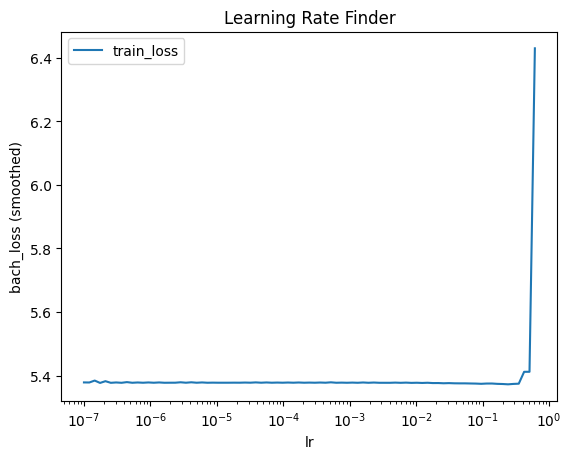

Melhor Learning Rate encontrado: 0.024201

--- Treinamento com Early Stopping ---
0:	[2s / 2s],		train_loss: 5.3773,	val_loss: 4.9740
1:	[3s / 5s],		train_loss: 5.3779,	val_loss: 4.9753
2:	[2s / 8s],		train_loss: 5.3733,	val_loss: 4.9690
3:	[3s / 12s],		train_loss: 5.3692,	val_loss: 4.9573
4:	[3s / 15s],		train_loss: 5.3650,	val_loss: 4.9524
5:	[3s / 18s],		train_loss: 5.3558,	val_loss: 4.9416
6:	[3s / 21s],		train_loss: 5.3440,	val_loss: 4.9383
7:	[3s / 24s],		train_loss: 5.3340,	val_loss: 4.9023
8:	[3s / 27s],		train_loss: 5.3251,	val_loss: 4.9218
9:	[3s / 31s],		train_loss: 5.3225,	val_loss: 4.9106
10:	[4s / 35s],		train_loss: 5.3305,	val_loss: 4.9101
11:	[2s / 38s],		train_loss: 5.3058,	val_loss: 4.9291
12:	[3s / 41s],		train_loss: 5.3036,	val_loss: 4.9500
13:	[3s / 44s],		train_loss: 5.3036,	val_loss: 4.9258
14:	[2s / 47s],		train_loss: 5.2835,	val_loss: 4.9029
15:	[3s / 50s],		train_loss: 5.2872,	val_loss: 4.8954
16:	[3s / 53s],		train_loss: 5.2904,	val_loss: 4.8925
17:	[2s / 56s

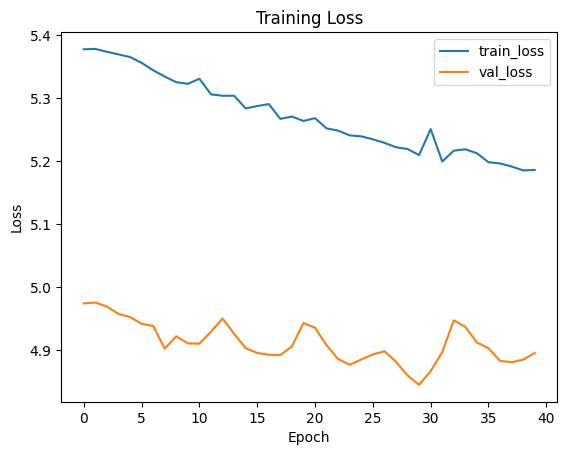


--- Avaliação no conjunto de validação ---
Partial Log-Likelihood no conjunto de validação: -4.8450

--- Cálculo da Baseline Hazard ---

--- Predição de Sobrevivência no conjunto de teste ---

--- Plot das Curvas de Sobrevivência (primeiros 5 pacientes do teste) ---


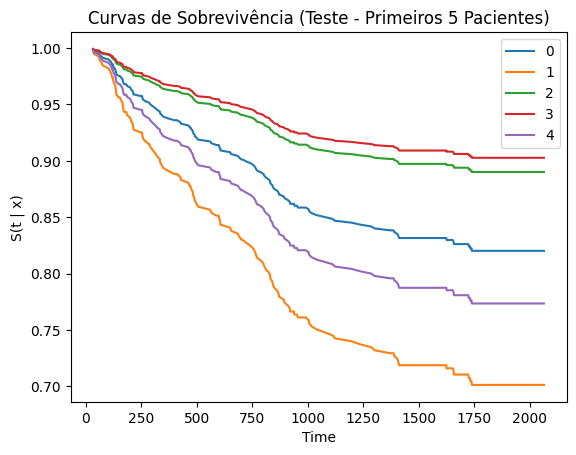

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# 🔹 Fixar seeds para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# 🔹 Definir o modelo convolucional como função para flexibilidade
def create_cnn_model(out_channels1, out_channels2, kernel_size1, kernel_size2):
    return nn.Sequential(
        nn.Conv1d(in_channels=3, out_channels=out_channels1, kernel_size=kernel_size1, stride=2),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2),
        nn.Conv1d(out_channels1, out_channels2, kernel_size=kernel_size2, stride=2),
        nn.ReLU(),
        nn.AdaptiveAvgPool1d(1),
        nn.Flatten(),  # Deixa a saída com shape (batch, out_channels2)
        nn.Linear(out_channels2, 1)
    )

# ----------------------- HIPERPARÂMETROS ENCONTRADOS PELO OPTUNA (SUBSTITUA COM SEUS MELHORES VALORES) -----------------------
best_params = {
    'out_channels1': 25,  # Substitua pelo seu melhor valor
    'out_channels2': 48,  # Substitua pelo seu melhor valor
    'kernel_size1': 7,   # Substitua pelo seu melhor valor
    'kernel_size2': 5,   # Substitua pelo seu melhor valor
    'lr': 0.001        # Substitua pelo seu melhor valor
}

print("--- Aplicando os melhores hiperparâmetros ---")

# 🔸 Criar o modelo com os melhores hiperparâmetros
best_out_channels1 = best_params['out_channels1']
best_out_channels2 = best_params['out_channels2']
best_kernel_size1 = best_params['kernel_size1']
best_kernel_size2 = best_params['kernel_size2']
best_lr = best_params['lr']

best_net = create_cnn_model(best_out_channels1, best_out_channels2, best_kernel_size1, best_kernel_size2)
best_model = CoxPH(best_net, tt.optim.Adam)
best_model.optimizer.set_lr(best_lr)

# 🔸 Converter os dados para tensores (se ainda não foram)
y_train_tensor = (torch.tensor(y_train[0]).float(), torch.tensor(y_train[1]).long())
y_val_tensor = (torch.tensor(y_val[0]).float(), torch.tensor(y_val[1]).long())
y_test_tensor = (torch.tensor(y_test[0]).float(), torch.tensor(y_test[1]).long())

val_tensor = (x_val, y_val_tensor)

# ⏱️ Medir o tempo de treinamento
print("\n--- Treinamento com Learning Rate Finder ---")
start_time_lr_finder = time.time()
batch_size = 256
lrfinder = best_model.lr_finder(x_train, y_train_tensor, batch_size, tolerance=10)
end_time_lr_finder = time.time()
print(f"Tempo para Learning Rate Finder: {end_time_lr_finder - start_time_lr_finder:.2f} segundos")
_ = lrfinder.plot()
plt.title("Learning Rate Finder")
plt.show()

best_lr_found = lrfinder.get_best_lr()
print(f"Melhor Learning Rate encontrado: {best_lr_found:.6f}")
best_model.optimizer.set_lr(best_lr_found)

print("\n--- Treinamento com Early Stopping ---")
start_time_training = time.time()
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

log = best_model.fit(x_train, y_train_tensor, batch_size, epochs, callbacks, verbose,
                    val_data=val_tensor, val_batch_size=batch_size)
end_time_training = time.time()
print(f"Tempo de treinamento: {end_time_training - start_time_training:.2f} segundos")

_ = log.plot()
plt.title("Training Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

print("\n--- Avaliação no conjunto de validação ---")
partial_loglik_val = best_model.partial_log_likelihood(*val_tensor).mean().item()
print(f"Partial Log-Likelihood no conjunto de validação: {partial_loglik_val:.4f}")

print("\n--- Cálculo da Baseline Hazard ---")
_ = best_model.compute_baseline_hazards()

print("\n--- Predição de Sobrevivência no conjunto de teste ---")
surv = best_model.predict_surv_df(x_test)

print("\n--- Plot das Curvas de Sobrevivência (primeiros 5 pacientes do teste) ---")
surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Curvas de Sobrevivência (Teste - Primeiros 5 Pacientes)")
plt.show()




- Para treinar o modelo, precisamos definir um otimizador. Você pode escolher qualquer torch.optimotimizador, mas aqui usamos um de , tt.optim pois ele tem algumas funcionalidades adicionais. Usamos o Adam otimizador, mas em vez de escolher uma taxa de aprendizado, usaremos o esquema proposto por [Smith em 2017](https://arxiv.org/pdf/1506.01186) para encontrar uma taxa de aprendizado adequada com model.lr_finder. Veja esta publicação para uma explicação.


np.float64(0.004534878508128605)

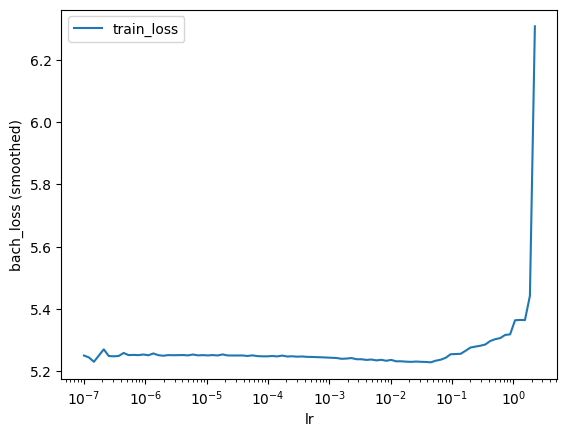

In [59]:

model = CoxPH(best_net, tt.optim.Adam)

#batch_size = 256
lrfinder = model.lr_finder(x_train, y_train_tensor, batch_size, tolerance=10)

_ = lrfinder.plot()

lrfinder.get_best_lr()


In [ ]:
# best_lr = lrfinder.get_best_lr()
# model.optimizer.set_lr(best_lr)

# model.optimizer.set_lr(0.01)


Muitas vezes, essa taxa de aprendizagem é um pouco alta, então a definimos manualmente para 0,01

model.optimizer.set_lr(0.01)

Incluímos o EarlyStopping retorno de chamada para interromper o treinamento quando a perda de validação parar de melhorar. Após o treinamento, esse retorno de chamada também carregará o modelo com melhor desempenho em termos de perda de validação.


0:	[0s / 0s],		train_loss: 5.2958,	val_loss: 5.2355
1:	[0s / 1s],		train_loss: 5.2498,	val_loss: 5.6899
2:	[1s / 2s],		train_loss: 5.2433,	val_loss: 5.1991
3:	[0s / 3s],		train_loss: 5.2306,	val_loss: 5.2088
4:	[0s / 4s],		train_loss: 5.2175,	val_loss: 5.1659
5:	[0s / 4s],		train_loss: 5.2089,	val_loss: 5.1811
6:	[0s / 5s],		train_loss: 5.2159,	val_loss: 5.1743
7:	[0s / 6s],		train_loss: 5.1891,	val_loss: 5.1503
8:	[0s / 6s],		train_loss: 5.1969,	val_loss: 5.1468
9:	[1s / 8s],		train_loss: 5.1838,	val_loss: 5.1300
10:	[0s / 8s],		train_loss: 5.1766,	val_loss: 5.1084
11:	[0s / 9s],		train_loss: 5.1647,	val_loss: 5.1013
12:	[0s / 10s],		train_loss: 5.1524,	val_loss: 5.1568
13:	[0s / 10s],		train_loss: 5.1696,	val_loss: 5.0790
14:	[0s / 11s],		train_loss: 5.1481,	val_loss: 5.0887
15:	[0s / 11s],		train_loss: 5.1507,	val_loss: 5.1265
16:	[0s / 12s],		train_loss: 5.1310,	val_loss: 5.0629
17:	[0s / 13s],		train_loss: 5.1425,	val_loss: 5.0469
18:	[0s / 14s],		train_loss: 5.1427,	val_loss: 5.0

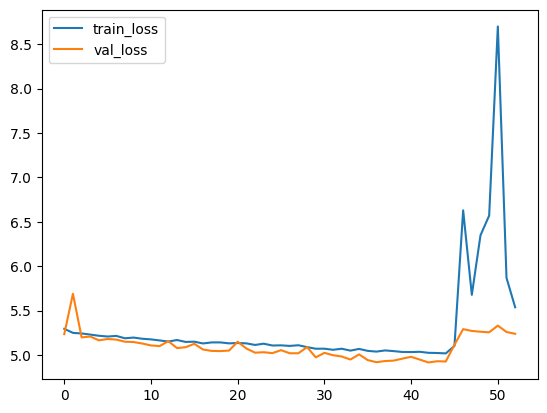

In [ ]:
%%time
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True


log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

_ = log.plot()




Podemos obter o logaritmo parcial da verossimilhança
We can get the partial log-likelihood

In [60]:
model.partial_log_likelihood(*val_tensor).mean()


np.float32(-4.8450294)

## Previsão
- Para avaliação, precisamos primeiro obter estimativas de sobrevivência para o conjunto de teste. Isso pode ser feito com model.predict_surv which retorna um array de estimativas de sobrevivência ou com model.predict_surv_df which retorna as estimativas de sobrevivência como um dataframe.

- Entretanto, como CoxCCé semiparamétrico, primeiro precisamos obter as estimativas de risco de base não paramétricas com compute_baseline_hazards.

- Observe que, para grandes conjuntos de dados, o sampleargumento pode ser usado para estimar o risco de base em um subconjunto.


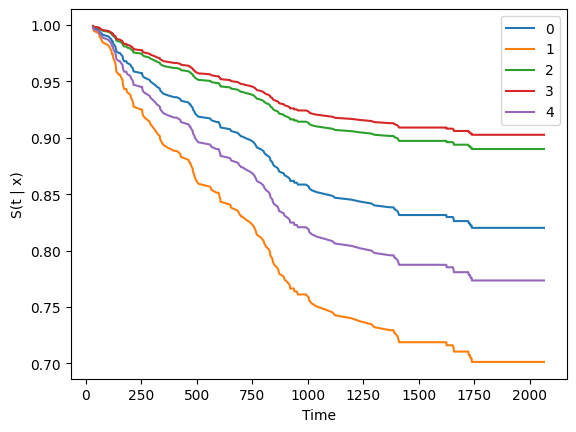

In [61]:

_ = model.compute_baseline_hazards()

surv = model.predict_surv_df(x_test)

surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')




## Avaliação
- Podemos usar a EvalSurvclasse para avaliar a concordância, o escore de Brier e a verossimilhança logarítmica binomial. A configuração censor_surv='km' significa que estimamos a distribuição de censura de Kaplan-Meier no conjunto de teste.


np.float64(0.35328716279078676)

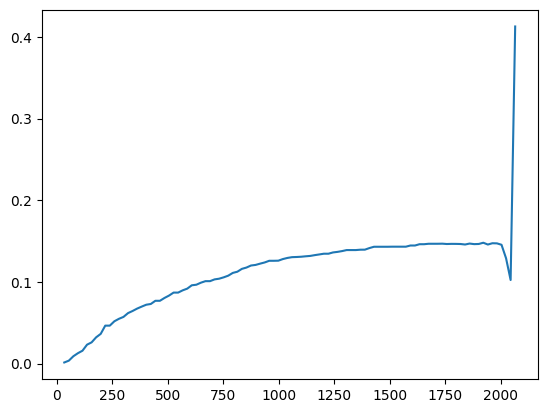

In [ ]:
from scipy.integrate import simps


# from scipy import integrate
# integrate = None  # ← quebra tudo

ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

# Calcular o C-index
ev.concordance_td()

time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

ev.integrated_brier_score(time_grid)

ev.integrated_nbll(time_grid)

 ### O C-index (ou Concordance Index) é uma métrica muito usada em modelos de sobrevivência, como o CoxPH e o DeepSurv, e avalia a capacidade do modelo de ordenar corretamente os tempos de sobrevivência.

 Interpretação do C-index:
- C-index = 1.0 → predição perfeita;

- C-index = 0.5 → modelo aleatório (sem poder preditivo);

- C-index < 0.5 → modelo está ordenando pior do que o acaso (isso é raro e preocupante).
 

In [65]:
from pycox.evaluation import EvalSurv
import numpy as np
import matplotlib.pyplot as plt

# Calcular o C-index
#c_index = ev.concordance_td()
print(f'C-index: {study.best_value:.4f}')


# Integrated Brier Score
int_brier_score = ev.integrated_brier_score(time_grid)
print(f'Integrated Brier Score: {int_brier_score:.4f}')

# Integrated Negative Binomial Log-Likelihood
int_nbll = ev.integrated_nbll(time_grid)
print(f'Integrated NLL: {int_nbll:.4f}')


C-index: 0.6910


NameError: name 'ev' is not defined

 ## Implementação com Optuna
- Avalia 30 combinações diferentes de parâmetros.

- Usa concordance_td() como métrica a maximizar.

- Treina e avalia seu modelo automaticamente a cada tentativa.

- Ao final, mostra os melhores hiperparâmetros encontrados.

In [ ]:
import optuna
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch

# 🔹 Fixar seeds para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# 🔹 Função objetivo para Optuna
def objective(trial):
    # 🔸 Sugestão de hiperparâmetros
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_nodes = [trial.suggest_int(f'n_units_l{i}', 32, 128) for i in range(num_layers)]
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    batch_norm = trial.suggest_categorical('batch_norm', [True, False])
    #lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)


    # 🔸 Criar rede neural
    net = tt.practical.MLPVanilla(
        in_features=x_train.shape[1],
        num_nodes=num_nodes,
        out_features=1,
        batch_norm=batch_norm,
        dropout=dropout
    )

    # 🔸 Definir modelo CoxPH
    model = CoxPH(net, tt.optim.Adam)
    model.optimizer.set_lr(lr)

    # 🔸 Treinamento
    batch_size = 256
    epochs = 256
    callbacks = [tt.callbacks.EarlyStopping()]
    verbose = False

    model.fit(x_train, y_train, batch_size, epochs,
              callbacks, verbose, val_data=val)
    
    # ✅ Calcular riscos basais antes de prever
    model.compute_baseline_hazards()
    
    # 🔸 Prever e avaliar na validação
    surv = model.predict_surv_df(x_val)
    ev = EvalSurv(surv, y_val[0], y_val[1], censor_surv='km')

    # 🔸 Retornar métrica a ser otimizada (C-index)
    return ev.concordance_td()

# 🔹 Executar busca com Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# 🔹 Mostrar melhores resultados
print('🎯 Melhores hiperparâmetros encontrados:')
best_params = study.best_params
print('Melhores parâmetros:', best_params)


print(f'✅ Melhor C-index na validação: {study.best_value:.4f}')



[I 2025-04-25 16:09:57,063] A new study created in memory with name: no-name-9d16ae2f-5257-4a8e-988c-9d8d02fd2b93
[I 2025-04-25 16:11:08,029] Trial 0 finished with value: 0.659484379677404 and parameters: {'num_layers': 1, 'n_units_l0': 57, 'dropout': 0.03598842172867156, 'batch_norm': True, 'lr': 5.372368081690521e-05}. Best is trial 0 with value: 0.659484379677404.
[I 2025-04-25 16:12:46,472] Trial 1 finished with value: 0.6562752490347349 and parameters: {'num_layers': 1, 'n_units_l0': 44, 'dropout': 0.3215976576268963, 'batch_norm': False, 'lr': 0.000285151838077551}. Best is trial 0 with value: 0.659484379677404.
[I 2025-04-25 16:13:36,733] Trial 2 finished with value: 0.6972143230483067 and parameters: {'num_layers': 1, 'n_units_l0': 93, 'dropout': 0.14033534236021017, 'batch_norm': False, 'lr': 0.002217933610556795}. Best is trial 2 with value: 0.6972143230483067.
[I 2025-04-25 16:15:09,684] Trial 3 finished with value: 0.8760771410402054 and parameters: {'num_layers': 3, 'n_uni

🎯 Melhores hiperparâmetros encontrados:
Melhores parâmetros: {'num_layers': 3, 'n_units_l0': 84, 'n_units_l1': 84, 'n_units_l2': 110, 'dropout': 0.08679803655445323, 'batch_norm': False, 'lr': 0.0019838972351298866}
✅ Melhor C-index na validação: 0.8955


In [ ]:
melhores_parametros = study.best_trial.params
print(melhores_parametros)




{'num_layers': 3, 'n_units_l0': 84, 'n_units_l1': 84, 'n_units_l2': 110, 'dropout': 0.08679803655445323, 'batch_norm': False, 'lr': 0.0019838972351298866}


In [ ]:
melhores_parametros

{'num_layers': 3,
 'n_units_l0': 84,
 'n_units_l1': 84,
 'n_units_l2': 110,
 'dropout': 0.08679803655445323,
 'batch_norm': False,
 'lr': 0.0019838972351298866}

0:	[0s / 0s],		train_loss: 6.2239,	val_loss: 5.9259
1:	[0s / 0s],		train_loss: 5.5282,	val_loss: 5.3159
2:	[0s / 1s],		train_loss: 5.3143,	val_loss: 5.2762
3:	[0s / 1s],		train_loss: 5.3041,	val_loss: 5.2606
4:	[0s / 2s],		train_loss: 5.3029,	val_loss: 5.2539
5:	[0s / 2s],		train_loss: 5.2776,	val_loss: 5.2496
6:	[0s / 2s],		train_loss: 5.2760,	val_loss: 5.2462
7:	[0s / 3s],		train_loss: 5.2817,	val_loss: 5.2430
8:	[0s / 3s],		train_loss: 5.2748,	val_loss: 5.2408
9:	[0s / 4s],		train_loss: 5.2823,	val_loss: 5.2384
10:	[0s / 4s],		train_loss: 5.2592,	val_loss: 5.2357
11:	[0s / 5s],		train_loss: 5.2583,	val_loss: 5.2330
12:	[0s / 5s],		train_loss: 5.2568,	val_loss: 5.2310
13:	[0s / 5s],		train_loss: 5.2494,	val_loss: 5.2289
14:	[0s / 6s],		train_loss: 5.2511,	val_loss: 5.2263
15:	[0s / 6s],		train_loss: 5.2492,	val_loss: 5.2243
16:	[0s / 7s],		train_loss: 5.2465,	val_loss: 5.2225
17:	[0s / 7s],		train_loss: 5.2440,	val_loss: 5.2209
18:	[0s / 8s],		train_loss: 5.2407,	val_loss: 5.2186
19:

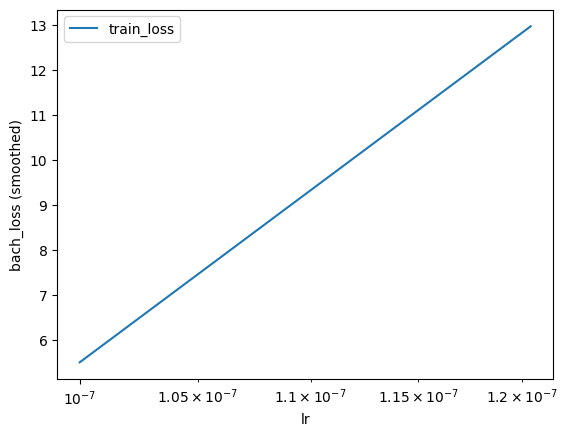

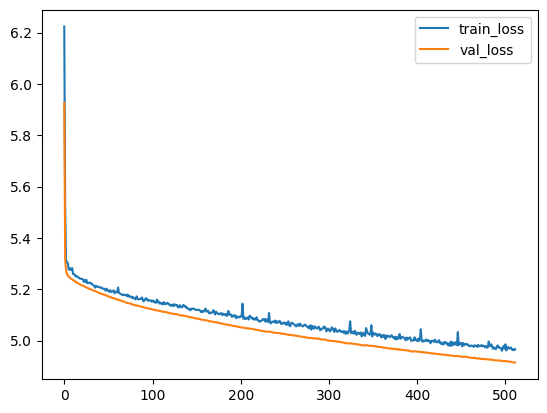

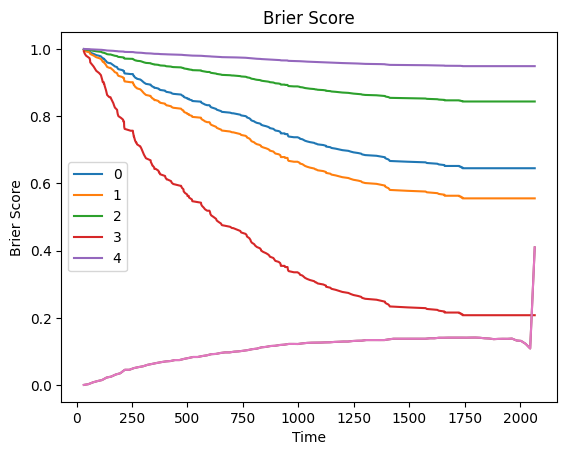

Integrated Brier Score: 0.1083
Integrated NLL: 0.3493


In [ ]:

in_features = x_train.shape[1]  # número de entradas (features)
num_nodes = num_nodes = [
    melhores_parametros['n_units_l0'],
    melhores_parametros['n_units_l1']
    #melhores_parametros['n_units_l2']
]
        # aumentamos o número de neurônios e adicionamos uma camada
out_features = 1
batch_norm = melhores_parametros['batch_norm']               # mantém a normalização em lote
dropout = melhores_parametros['dropout']                # aumentamos um pouco o dropout
output_bias = False

net = tt.practical.MLPVanilla(
    in_features=in_features,
    num_nodes=num_nodes,
    out_features=out_features,
    batch_norm=batch_norm,
    dropout=dropout,
    output_bias=output_bias
)


model = CoxPH(net, tt.optim.Adam)

batch_size = 256
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True


log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

_ = log.plot()

model.partial_log_likelihood(*val).mean()


_ = model.compute_baseline_hazards()

surv = model.predict_surv_df(x_test)

surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

from scipy.integrate import simps


# from scipy import integrate
# integrate = None  # ← quebra tudo

ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

# Calcular o C-index
ev.concordance_td()

time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

ev.integrated_brier_score(time_grid)

ev.integrated_nbll(time_grid)



from pycox.evaluation import EvalSurv
import numpy as np
import matplotlib.pyplot as plt

# Calcular o C-index
c_index = ev.concordance_td()
print(f'C-index: {c_index:.4f}')

# Gráfico da Brier Score
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
brier_score = ev.brier_score(time_grid)
_ = brier_score.plot()
plt.title('Brier Score')
plt.xlabel('Time')
plt.ylabel('Brier Score')
plt.show()

# Integrated Brier Score
int_brier_score = ev.integrated_brier_score(time_grid)
print(f'Integrated Brier Score: {int_brier_score:.4f}')

# Integrated Negative Binomial Log-Likelihood
int_nbll = ev.integrated_nbll(time_grid)
print(f'Integrated NLL: {int_nbll:.4f}')


In [ ]:
# Supondo que durations_test contenha os tempos de falha do conjunto de teste
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
# Calcular as métricas de avaliação
ev_test = EvalSurv(surv, durations_test, events_test, censor_surv='km')

# Cálculo do C-index
print(f'C-index teste: {ev_test.concordance_td():.4f}')

# Cálculo do IBS (integrated Brier score), agora com a grade de tempo
print(f'IBS teste: {ev_test.integrated_brier_score(time_grid):.4f}')

# Cálculo do NLL
print(f'NLL teste: {ev_test.integrated_nbll(time_grid):.4f}')


C-index teste: 0.7540
IBS teste: 0.1083
NLL teste: 0.3493


Testando novo paciente com os seguintes dados depois do modelo estiver pronto

In [ ]:
novo_paciente = pd.DataFrame([{
    'HRV_MeanNN': 750.0,
    'QRS_Duration': 90.0,
    'QT_Interval': 400.0,
    'Idade': 65,
    'Sex': 1
}])


In [ ]:
x_novo = x_mapper.transform(novo_paciente).astype('float32')


In [ ]:
# Prever a função de sobrevivência para o novo paciente
surv_novo = model.predict_surv_df(x_novo)

In [ ]:
risco_novo = 1 - surv_novo  # 1 - função de sobrevivência

Para interpretar o gráfico da função de sobrevivência, é importante entender que ela mostra a probabilidade de um evento (como falha ou morte) não ocorrer até um determinado tempo. Em outras palavras, ela descreve a probabilidade de um paciente sobreviver após um certo período de tempo.

No gráfico da função de sobrevivência, o eixo X representa o tempo e o eixo Y representa a probabilidade de sobrevivência (ou seja, a probabilidade de o evento de falha não ocorrer até aquele momento).

Interpretação do gráfico da função de sobrevivência:
Declínio da probabilidade: Se a curva estiver decaindo ao longo do tempo, isso indica que, à medida que o tempo passa, a probabilidade de o paciente "sobreviver" (ou seja, o evento de falha não ocorrer) diminui. Em outras palavras, a chance do evento acontecer aumenta com o tempo.

Plana (ou muito pouco declinante): Se a curva for mais plana, isso significa que a probabilidade de sobrevivência não está diminuindo muito ao longo do tempo, o que pode indicar que o paciente tem uma chance maior de "sobreviver" ou evitar o evento de falha por um longo período.

Valor no eixo Y: O valor de 1 no eixo Y representa uma probabilidade de sobrevivência de 100% (ou seja, o evento de falha ainda não ocorreu no momento considerado). À medida que a função de sobrevivência decai, o valor de Y diminui, o que indica uma maior chance do evento ocorrer.

Pontos de queda: Se o gráfico apresenta quedas abruptas, isso pode indicar que o evento de falha ocorre rapidamente em alguns pontos do tempo. A forma e a rapidez da queda fornecem insights sobre a distribuição temporal dos eventos de falha.

Exemplo de como interpretar:
Se no gráfico você vê que aos 30 dias a probabilidade de sobrevivência é 0.8, isso significa que, com base nos dados, há 80% de chance de o paciente sobreviver até 30 dias sem o evento ocorrer.

Se a curva atinge 0 no final, isso significa que, ao longo do tempo (nos últimos pontos), a probabilidade de sobrevivência se aproxima de 0%, ou seja, o evento ocorreu para todos os indivíduos no conjunto de dados.

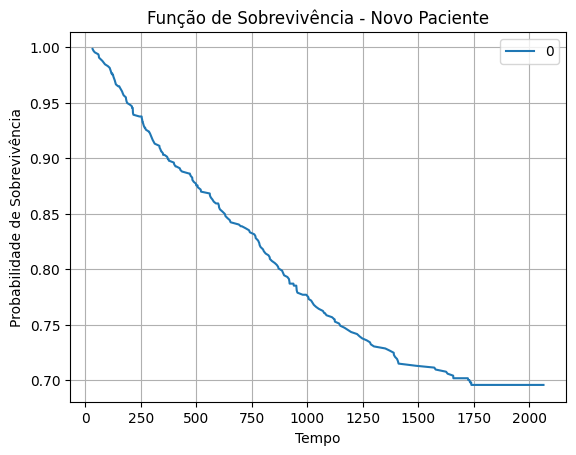

In [ ]:
import matplotlib.pyplot as plt

surv_novo.plot()
plt.title('Função de Sobrevivência - Novo Paciente')
plt.xlabel('Tempo')
plt.ylabel('Probabilidade de Sobrevivência')
plt.grid(True)
plt.show()


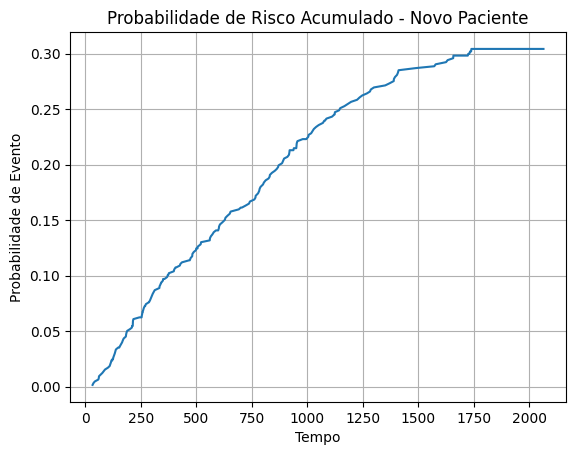

In [ ]:
import matplotlib.pyplot as plt

# Plotando a linha de risco acumulado para o paciente
risco_novo.plot(legend=False)  # Remove a legenda, se necessário
plt.title('Probabilidade de Risco Acumulado - Novo Paciente')
plt.xlabel('Tempo')
plt.ylabel('Probabilidade de Evento')
plt.grid(True)
plt.show()


## Treinando o modelo Redes CNN (convolutional neural network)

In [ ]:
import torch
import torch.nn as nn
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

# Modelo CNN para sinais ECG com 3 derivações (X, Y, Z)
class ECG_CoxNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=16, kernel_size=7, stride=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(16, 32, kernel_size=5, stride=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),  # saída: (batch, 32, 1)
        )
        self.output = nn.Linear(32, 1)  # f(x)

    def forward(self, x):
        x = self.feature_extractor(x)    # (batch, 32, 1)
        x = x.view(x.size(0), -1)        # (batch, 32)
        return self.output(x)            # (batch, 1)

if __name__ == "__main__":
    # ------- Simulação de um dataset -------
    batch_size = 500
    sinal_len = 3000  # ex: 10 s de ECG a 300 Hz

    # Sinais com 3 canais (X, Y, Z)
    x_train = torch.randn(batch_size, 3, sinal_len)
    # Tempo até o evento (unidade arbitrária)
    durations = torch.randint(low=10, high=1000, size=(batch_size,))
    # Evento: 1=ocorreu, 0=censurado
    events = torch.randint(low=0, high=2, size=(batch_size,))

    # ------- Inicializa modelo e otimizador -------
    net = ECG_CoxNet()
    model = CoxPH(net, tt.optim.Adam)

    # ------- Treinamento -------
    model.fit(x_train, (durations, events),
              batch_size=64, epochs=10, verbose=True)

    # ------- Avaliação -------
    model.compute_baseline_hazards()
    surv = model.predict_surv_df(x_train)  
    ev = EvalSurv(surv,
                  durations.numpy(),
                  events.numpy(),
                  censor_surv='km')
    print("C-index:", ev.concordance_td())


0:	[0s / 0s],		train_loss: 3.2703
1:	[0s / 0s],		train_loss: 3.2580
2:	[0s / 1s],		train_loss: 3.2593
3:	[0s / 1s],		train_loss: 3.2671
4:	[0s / 1s],		train_loss: 3.2678
5:	[0s / 1s],		train_loss: 3.2579
6:	[0s / 2s],		train_loss: 3.2467
7:	[0s / 2s],		train_loss: 3.2494
8:	[0s / 2s],		train_loss: 3.2573
9:	[0s / 2s],		train_loss: 3.2519
C-index: 0.6246377668697144
